In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#toronto = pd.read_csv('/kaggle/inputToronto_temp.csv')
toronto = pd.read_csv('Toronto_temp.csv')

In [3]:
toronto.head()

,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
0,31-Jan-18,"2,018",1,31,-7.0,2.0,-15.0,0.0,1.0,1.0,Winter
1,30-Jan-18,"2,018",1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0,Winter
2,29-Jan-18,"2,018",1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0,Winter
3,28-Jan-18,"2,018",1,28,1.0,5.0,-3.0,0.0,0.0,0.0,Winter
4,27-Jan-18,"2,018",1,27,5.0,10.0,0.0,2.0,0.0,2.0,Winter


In [4]:
toronto.tail()

,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
2884,01-Dec-41,1941,12,1,-1.5,1.9,-4.8,24.9,16.3,41.1,Winter
2885,01-Dec-40,1940,12,1,-3.6,0.6,-7.7,68.1,14.5,82.6,Winter
2886,01-Dec-39,1939,12,1,NaN,NaN,NaN,NaN,NaN,NaN,Winter
2887,01-Dec-38,1938,12,1,-2.5,1.1,-6.1,13.7,13.7,27.4,Winter
2888,01-Dec-37,1937,12,1,-4.4,0.1,-8.8,7.6,33.8,41.4,Winter


In [5]:
toronto.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Mean Temp (C)', 'Max Temp (C)',
       'Min Temp (C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'season'],
      dtype='object')

In [6]:
toronto.shape

(2889, 11)

In [7]:
toronto['Year'].value_counts()

2,016    366
2,014    365
2,015    365
2,017    365
2,018    318
        ... 
2010      12
1949      12
1999      12
2013       6
1937       2
Name: Year, Length: 83, dtype: int64

In [8]:
toronto[toronto['Year']=='2,018']['Month'].value_counts()

10    31
8     31
7     31
5     31
3     31
1     31
9     30
6     30
4     30
2     28
11    14
Name: Month, dtype: int64

In [9]:
toronto[toronto['Year']=='2,013']['Month'].value_counts()

12    31
10    31
8     31
7     31
11    30
9     30
6     18
Name: Month, dtype: int64

In [10]:
toronto['Year'] = toronto['Year'].str.replace(',','').astype('int')
toronto['Year'].value_counts()

2016    366
2017    365
2015    365
2014    365
2018    318
       ... 
1959     12
1961     12
1963     12
1938     12
1937      2
Name: Year, Length: 82, dtype: int64

In [11]:
toronto[toronto['Year']==1939]

,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
229,01-Jan-39,1939,1,1,-6.7,-1.3,-12.0,2.5,45.7,48.3,Winter
446,01-Feb-39,1939,2,1,-5.8,-0.5,-11.1,30.2,57.9,88.1,Winter
677,01-Mar-39,1939,3,1,-3.6,0.7,-7.8,26.2,54.4,80.5,Spring
903,01-Apr-39,1939,4,1,4.1,8.2,-0.1,57.7,32.5,90.2,Spring
1134,01-May-39,1939,5,1,13.9,21.1,6.6,26.4,0.0,26.4,Spring
1378,01-Jun-39,1939,6,1,18.0,24.6,11.4,51.8,0.0,51.8,Summer
1639,01-Jul-39,1939,7,1,20.9,28.2,13.5,39.4,0.0,39.4,Summer
1900,01-Aug-39,1939,8,1,21.7,28.7,14.7,51.6,0.0,51.6,Summer
2155,01-Sep-39,1939,9,1,NaN,NaN,NaN,NaN,NaN,NaN,Fall
2416,01-Oct-39,1939,10,1,NaN,NaN,NaN,NaN,NaN,NaN,Fall


In [12]:
toronto = toronto[toronto['Year']>1939]
toronto = toronto.sort_values(by=['Year','Month','Day']).reset_index()

In [13]:
toronto.iloc[875:905]

,index,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
875,2813,01-Dec-12,2012,12,1,0.8,4.1,-2.5,43.2,16.2,58.4,Winter
876,155,01-Jan-13,2013,1,1,-2.1,1.8,-6.1,54.2,14.4,66.4,Winter
877,372,01-Feb-13,2013,2,1,-4.6,-1.0,-8.1,23.9,65.3,92.0,Winter
878,603,01-Mar-13,2013,3,1,0.1,3.9,-3.7,13.8,8.2,21.6,Spring
879,829,01-Apr-13,2013,4,1,6.0,11.0,1.0,102.6,2.2,110.4,Spring
880,1060,01-May-13,2013,5,1,15.2,21.0,9.4,75.6,0.4,76.2,Spring
881,1304,01-Jun-13,2013,6,1,16.5,20.6,12.4,62.4,0.0,62.4,Summer
882,1303,13-Jun-13,2013,6,13,19.0,23.0,14.0,11.0,0.0,11.0,Summer
883,1302,14-Jun-13,2013,6,14,18.0,23.0,13.0,0.0,0.0,0.0,Summer
884,1301,15-Jun-13,2013,6,15,18.0,26.0,10.0,0.0,0.0,0.0,Summer


In [14]:
#toronto_after_201306 = toronto[toronto['Year'].isin(['2,013','2,014','2,015','2,016','2,017','2,018'])]
toronto_after_201306 = toronto.iloc[900:2849]
#toronto_after_201306.head()
toronto_after_201306.tail()

,index,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
2844,2161,27-Oct-18,2018,10,27,4.0,6.0,1.0,7.0,2.0,10.0,Fall
2845,2160,28-Oct-18,2018,10,28,4.0,6.0,1.0,1.0,0.0,1.0,Fall
2846,2159,29-Oct-18,2018,10,29,NaN,NaN,NaN,NaN,NaN,NaN,Fall
2847,2158,30-Oct-18,2018,10,30,5.0,11.0,-2.0,1.0,0.0,1.0,Fall
2848,2157,31-Oct-18,2018,10,31,9.0,14.0,4.0,16.0,0.0,16.0,Fall


In [15]:
toronto_daily_after_201306 = toronto.iloc[882:]
toronto_before_201306 = toronto.iloc[:882]

In [16]:
toronto_monthly_before_201306_1 = toronto_before_201306[[
                        'Mean Temp (C)', 'Max Temp (C)', 'Min Temp (C)',
                        'Year', 'Month'
                        ]].groupby(['Year','Month']).mean()
toronto_monthly_before_201306_2 = toronto_before_201306[[
                        'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
                        'Year', 'Month'
                        ]].groupby(['Year','Month']).mean()
toronto_monthly_before_201306 = pd.concat([
                        toronto_monthly_before_201306_1,
                        toronto_monthly_before_201306_2,
                        ], axis=1)
toronto_monthly_before_201306.head()

Mean Temp (C)  Max Temp (C)  Min Temp (C)  Total Rain (mm)  \
Year Month                                                               
1940 1               -9.4          -5.2         -13.6             26.7   
     2               -6.2          -2.2         -10.1              6.9   
     3               -5.2          -1.3          -9.1             13.2   
     4                4.1           8.8          -0.6             45.5   
     5               11.7          16.7           6.6            123.4   

            Total Snow (cm)  Total Precip (mm)  
Year Month                                      
1940 1                 21.6               48.3  
     2                 27.2               34.0  
     3                 35.1               48.3  
     4                  5.3               50.8  
     5                  0.0              123.4

In [17]:
toronto_monthly_after_201306_1 = toronto_after_201306[[
    'Mean Temp (C)', 'Max Temp (C)', 'Min Temp (C)',
    'Year', 'Month'
    ]].groupby(['Year','Month']).mean().round(decimals=1)
toronto_monthly_after_201306_2 = toronto_after_201306[[
    'Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Year','Month'
    ]].groupby(['Year','Month']).sum()
toronto_monthly_after_201306 = pd.concat([
    toronto_monthly_after_201306_1,
    toronto_monthly_after_201306_2,
    ], axis=1)
toronto_monthly_after_201306.head()

Mean Temp (C)  Max Temp (C)  Min Temp (C)  Total Rain (mm)  \
Year Month                                                               
2013 7               22.2          27.0          17.6            182.0   
     8               20.9          26.0          15.9             68.0   
     9               16.1          21.3          11.1             69.0   
     10              10.9          15.6           6.1             55.0   
     11               2.0           6.2          -2.0             31.0   

            Total Snow (cm)  Total Precip (mm)  
Year Month                                      
2013 7                  0.0              182.0  
     8                  0.0               68.0  
     9                  0.0               69.0  
     10                 0.0               55.0  
     11                 5.0               36.0

In [18]:
toronto_monthly = pd.concat([
                toronto_monthly_before_201306, toronto_monthly_after_201306
                ], axis=0)
toronto_monthly.head()

Mean Temp (C)  Max Temp (C)  Min Temp (C)  Total Rain (mm)  \
Year Month                                                               
1940 1               -9.4          -5.2         -13.6             26.7   
     2               -6.2          -2.2         -10.1              6.9   
     3               -5.2          -1.3          -9.1             13.2   
     4                4.1           8.8          -0.6             45.5   
     5               11.7          16.7           6.6            123.4   

            Total Snow (cm)  Total Precip (mm)  
Year Month                                      
1940 1                 21.6               48.3  
     2                 27.2               34.0  
     3                 35.1               48.3  
     4                  5.3               50.8  
     5                  0.0              123.4

In [19]:
toronto_monthly.reset_index(level=['Year', 'Month'], inplace=True)
toronto_monthly.head()

,Year,Month,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,1940,1,-9.4,-5.2,-13.6,26.7,21.6,48.3
1,1940,2,-6.2,-2.2,-10.1,6.9,27.2,34.0
2,1940,3,-5.2,-1.3,-9.1,13.2,35.1,48.3
3,1940,4,4.1,8.8,-0.6,45.5,5.3,50.8
4,1940,5,11.7,16.7,6.6,123.4,0.0,123.4


In [20]:
toronto_monthly['Year-Month'] = (
                            toronto_monthly['Year'].map(str)
                            + toronto_monthly['Month'].map(str).str.zfill(2)
                            )
toronto_monthly.head()

,Year,Month,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Year-Month
0,1940,1,-9.4,-5.2,-13.6,26.7,21.6,48.3,194001
1,1940,2,-6.2,-2.2,-10.1,6.9,27.2,34.0,194002
2,1940,3,-5.2,-1.3,-9.1,13.2,35.1,48.3,194003
3,1940,4,4.1,8.8,-0.6,45.5,5.3,50.8,194004
4,1940,5,11.7,16.7,6.6,123.4,0.0,123.4,194005


In [21]:
toronto_monthly.dtypes

Year                   int64
Month                  int64
Mean Temp (C)        float64
Max Temp (C)         float64
Min Temp (C)         float64
Total Rain (mm)      float64
Total Snow (cm)      float64
Total Precip (mm)    float64
Year-Month            object
dtype: object

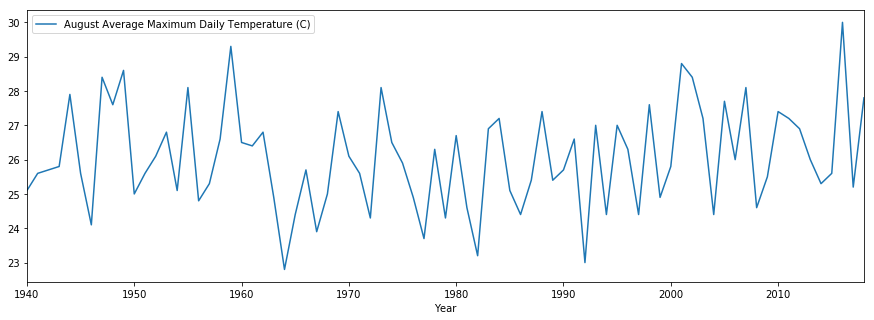

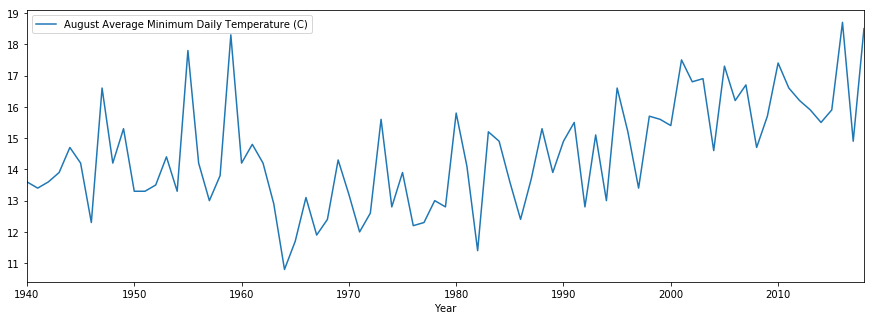

In [22]:
toronto_monthly[toronto_monthly['Month']==8].plot.line(
    x='Year', y='Max Temp (C)', figsize = (15, 5),
    label='August Average Maximum Daily Temperature (C)')
toronto_monthly[toronto_monthly['Month']==8].plot.line(
    x='Year', y='Min Temp (C)', figsize = (15, 5),
    label='August Average Minimum Daily Temperature (C)')
plt.show()

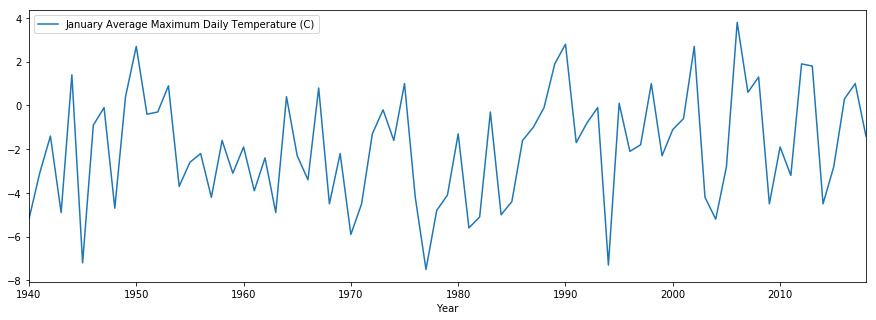

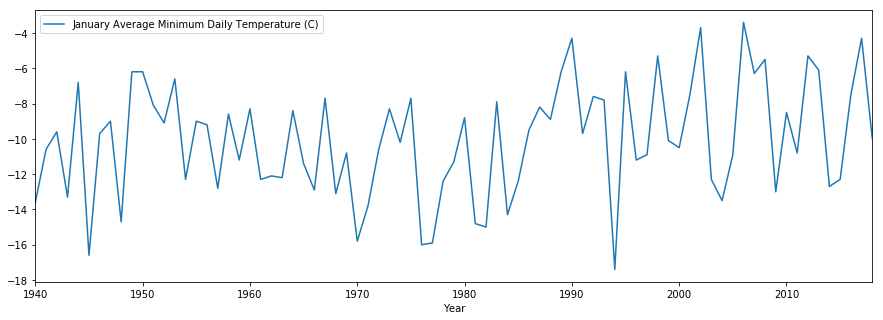

In [23]:
toronto_monthly[toronto_monthly['Month']==1].plot.line(
    x='Year', y='Max Temp (C)', figsize = (15, 5),
    label='January Average Maximum Daily Temperature (C)')
toronto_monthly[toronto_monthly['Month']==1].plot.line(
    x='Year', y='Min Temp (C)', figsize = (15, 5),
    label='January Average Minimum Daily Temperature (C)')
plt.show()

In [24]:
toronto_monthly.tail()

,Year,Month,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Year-Month
941,2018,6,19.5,24.5,14.5,50.0,0.0,50.0,201806
942,2018,7,23.4,28.7,18.1,63.0,0.0,63.0,201807
943,2018,8,23.3,27.8,18.5,119.0,0.0,119.0,201808
944,2018,9,19.3,23.6,14.6,48.0,0.0,48.0,201809
945,2018,10,9.2,13.1,5.0,65.0,2.0,68.0,201810


In [25]:
toronto_annual_1 = toronto_monthly[:936][[
    'Mean Temp (C)', 'Max Temp (C)', 'Min Temp (C)', 'Year'
    ]].groupby('Year').mean().round(decimals=1)
toronto_annual_2 = toronto_monthly[:936][[
    'Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Year'
    ]].groupby('Year').sum()

toronto_annual = pd.concat([toronto_annual_1, toronto_annual_2], axis=1)

In [26]:
toronto_annual.reset_index(level='Year', inplace=True)
toronto_annual.head()

,Year,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,1940,6.1,10.8,1.2,726.1,164.7,890.7
1,1941,8.0,13.1,2.9,524.9,104.1,628.9
2,1942,7.5,12.3,2.6,809.5,153.4,962.9
3,1943,6.5,11.6,1.4,586.6,125.1,711.7
4,1944,7.5,12.6,2.5,644.1,183.7,827.8


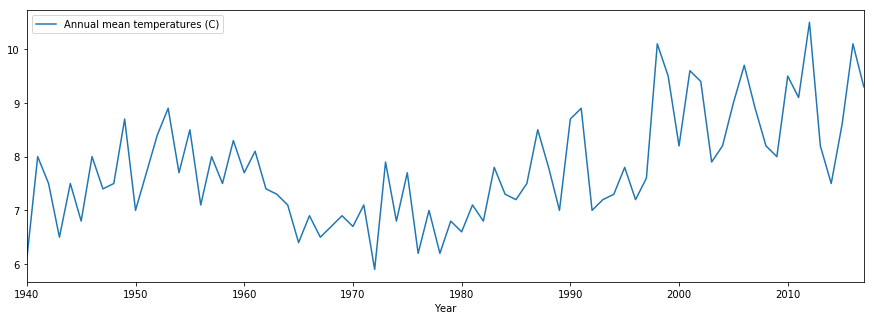

In [27]:
toronto_annual.plot.line(
    x='Year', y='Mean Temp (C)', figsize = (15, 5),
    label='Annual mean temperatures (C)')
plt.show()

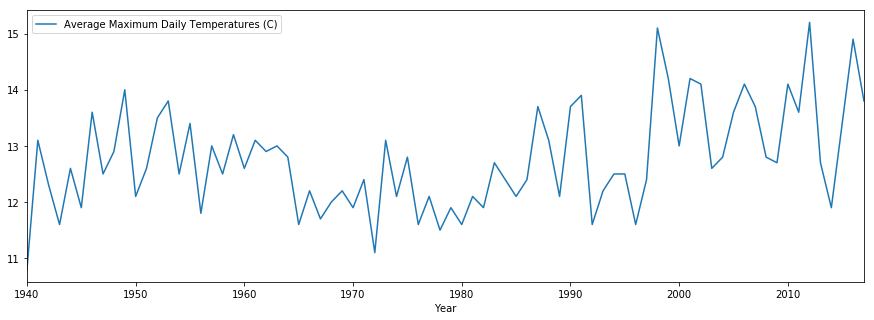

In [28]:
'''
This is actually the following data:
the maximum daily temperatures, averaged over each month, and then averaged over the 12 months.
If all 12 months are of the same length, then it would be the TRUE average maximum daily temperature.
'''
toronto_annual.plot.line(
    x='Year', y='Max Temp (C)', figsize = (15, 5),
    label='Average Maximum Daily Temperatures (C)')
plt.show()

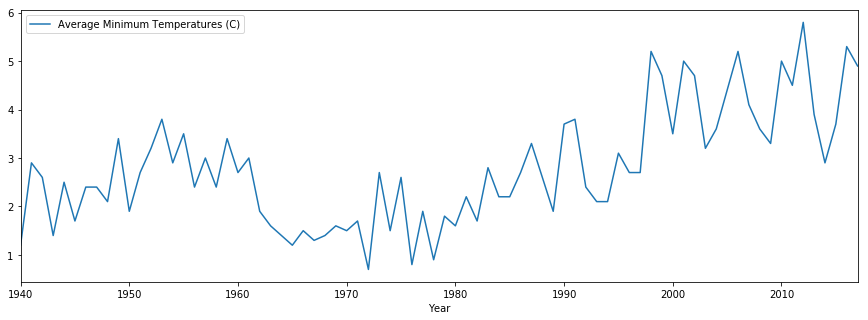

In [29]:
'''
This is actually the following data:
the minimum daily temperatures, averaged over each month, and then averaged over the 12 months.
If all 12 months are of the same length, then it would be the TRUE average minimum daily temperature.
'''
toronto_annual.plot.line(
    x='Year', y='Min Temp (C)', figsize = (15, 5),
    label='Average Minimum Temperatures (C)')
plt.show()

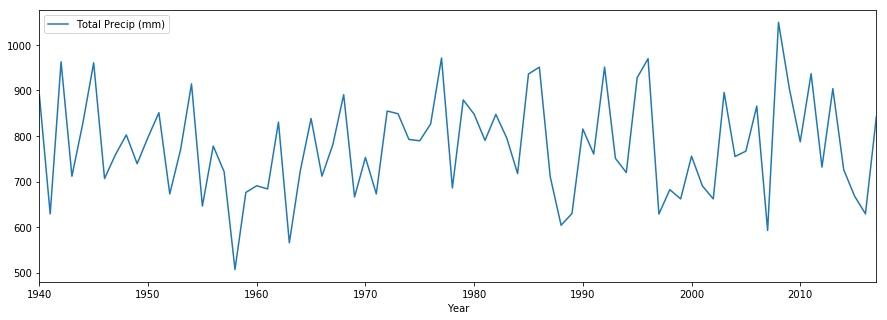

In [30]:
toronto_annual.plot.line(x='Year', y='Total Precip (mm)', figsize = (15, 5))
plt.show()

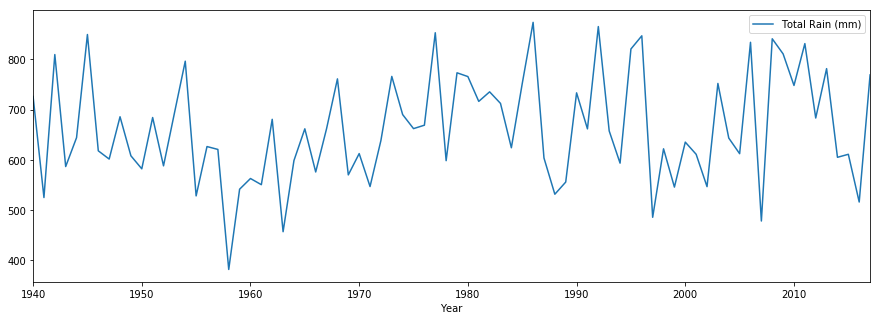

In [31]:
toronto_annual.plot.line(x='Year', y='Total Rain (mm)', figsize = (15, 5))
plt.show()

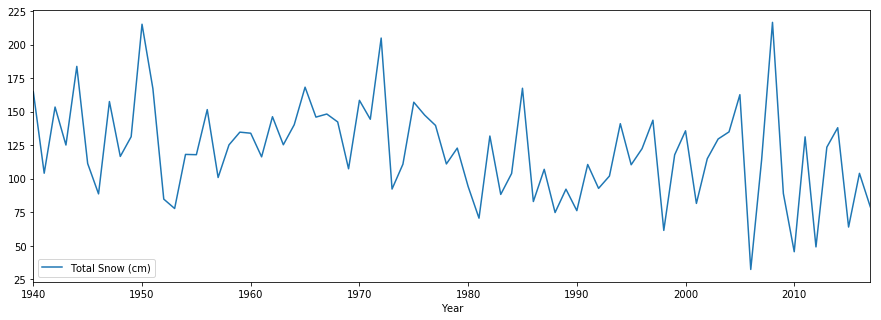

In [32]:
toronto_annual.plot.line(x='Year', y='Total Snow (cm)', figsize = (15, 5))
plt.show()

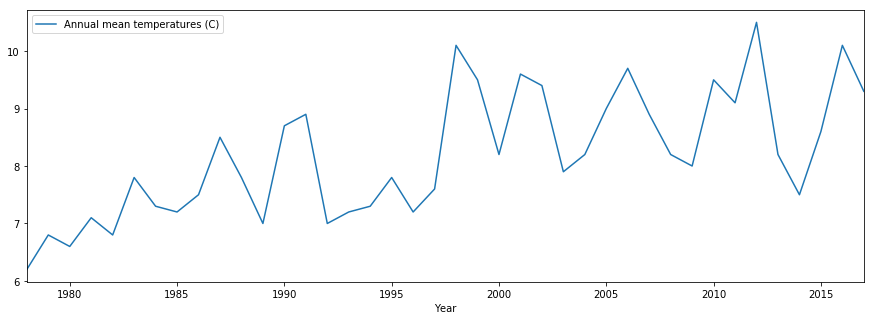

In [33]:
toronto_annual[toronto_annual['Year'] > 1977].plot.line(
    x='Year', y='Mean Temp (C)', figsize = (15, 5),
    label='Annual mean temperatures (C)')
plt.show()

In [34]:
x = toronto_annual[toronto_annual['Year'] > 1977]['Year'].to_numpy().reshape(-1, 1)
y = toronto_annual[toronto_annual['Year'] > 1977]['Mean Temp (C)'].to_numpy()
reg = LinearRegression().fit(x, y)

In [35]:
reg.score(x, y)

0.4613370952693268

In [36]:
print(reg.coef_[0], reg.intercept_)

0.06365853658536585 -118.9629268292683


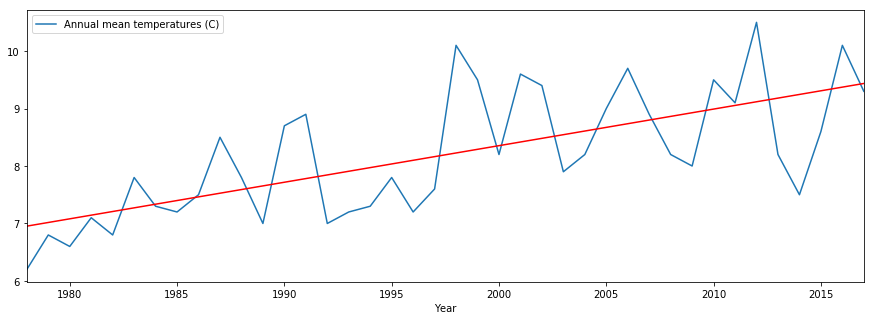

In [37]:
toronto_annual[toronto_annual['Year'] > 1977].plot.line(
    x='Year', y='Mean Temp (C)', figsize = (15, 5),
    label='Annual mean temperatures (C)')
regression_line = [(0.06365854*i)-118.9629268292683 for i in x]
plt.plot(x, regression_line, '-r')
plt.show()